In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
job_scarce_df = pd.read_csv('data/acceptance_data/job_scarce.csv')
job_scarce_df = job_scarce_df.fillna(axis=1,method='bfill')
job_scarce_df = job_scarce_df / 100
job_scarce_df

,1989-1993,1994-1998,1999-2004,2005-2009,2010-2014
Australia,0.48,0.48,0.36,0.36,0.27
China,0.21,0.12,0.18,0.16,0.13
Taiwan,0.04,0.04,0.04,0.04,0.06
Germany,0.28,0.30,0.30,0.31,0.35
Hong Kong,0.04,0.04,0.04,0.04,0.05
Japan,0.14,0.10,0.08,0.06,0.04
South Korea,0.20,0.03,0.04,0.02,0.06
Netherlands,0.60,0.63,0.63,0.56,0.39
New Zealand,0.28,0.28,0.29,0.29,0.29
Poland,0.27,0.05,0.04,0.15,0.13


In [4]:
neighbor1_df = pd.read_csv('data/acceptance_data/neighbors_immigrants.csv')
neighbor1_df = neighbor1_df.fillna(axis=1,method='bfill')
neighbor1_df = neighbor1_df / 100

neighbor2_df = pd.read_csv('data/acceptance_data/neighbors_race.csv')
neighbor2_df = neighbor2_df.fillna(axis=1,method='bfill')
neighbor2_df = neighbor2_df / 100

In [5]:
neighbor1_df

,1989-1993,1994-1998,1999-2004,2005-2009,2010-2014
Australia,0.95,0.95,0.94,0.94,0.89
China,0.87,0.80,0.84,0.83,0.88
Taiwan,0.83,0.83,0.92,0.92,0.92
Germany,0.83,0.92,0.92,0.89,0.79
Hong Kong,0.79,0.79,0.79,0.79,0.79
Japan,0.83,0.64,0.64,0.64,0.64
South Korea,0.47,0.61,0.53,0.62,0.56
Netherlands,0.90,0.95,0.87,0.87,0.80
New Zealand,0.95,0.95,0.93,0.93,0.94
Poland,0.90,0.79,0.76,0.82,0.93


In [6]:
neighbor2_df

,1989-1993,1994-1998,1999-2004,2005-2009,2010-2014
Australia,0.95,0.95,0.95,0.95,0.95
China,0.88,0.77,0.85,0.87,0.90
Taiwan,0.83,0.83,0.92,0.92,0.92
Germany,0.89,0.85,0.85,0.89,0.85
Hong Kong,0.73,0.73,0.73,0.73,0.81
Japan,0.89,0.89,0.89,0.89,0.89
South Korea,0.42,0.65,0.65,0.64,0.66
Netherlands,0.92,0.95,0.95,0.90,0.92
New Zealand,0.97,0.97,0.96,0.96,0.97
Poland,0.83,0.80,0.83,0.86,0.95


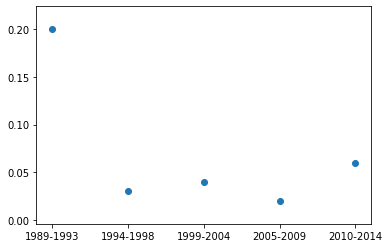

In [7]:
plt.scatter(job_scarce_df.iloc[6].index,job_scarce_df.iloc[6])

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression
from scipy import interpolate

acceptance_indicators = dict()

x = np.array([0,5,10,15,20])
for _, row in job_scarce_df.iterrows():
    y = np.array(row[['1989-1993', '1994-1998', '1999-2004', '2005-2009', '2010-2014']])
    
    spline = interpolate.interp1d(x, y, kind='cubic')
    
    #sample points from spline to fit a linear regression model
    X = np.arange(0,21).reshape(-1,1)
    reg = LinearRegression().fit(X, spline(X))

    acceptance_indicators[row.name] = {}
    acceptance_indicators[row.name]['job_scarce'] = {'coeff':reg.coef_[0][0],'intercept':reg.intercept_[0]}


for _, row in neighbor1_df.iterrows():
    y = np.array(row[['1989-1993', '1994-1998', '1999-2004', '2005-2009', '2010-2014']])
    
    spline = interpolate.interp1d(x, y, kind='cubic')
    
    #sample points from spline to fit a linear regression model
    X = np.arange(0,21).reshape(-1,1)
    reg = LinearRegression().fit(X, spline(X))

    acceptance_indicators[row.name]['neighbor1'] = {'coeff':reg.coef_[0][0],'intercept':reg.intercept_[0]}
    
for _, row in neighbor2_df.iterrows():
    y = np.array(row[['1989-1993', '1994-1998', '1999-2004', '2005-2009', '2010-2014']])
    
    spline = interpolate.interp1d(x, y, kind='cubic')
    
    #sample points from spline to fit a linear regression model
    X = np.arange(0,21).reshape(-1,1)
    reg = LinearRegression().fit(X, spline(X))

    acceptance_indicators[row.name]['neighbor2'] = {'coeff':reg.coef_[0][0],'intercept':reg.intercept_[0]}

In [9]:
acceptance_indicators['Australia']['job_scarce']['coeff']

-0.011183999999999998

In [11]:
import pickle

f = open('data/acceptance_data/acceptance_indicators_dict.pkl','wb')
pickle.dump(acceptance_indicators,f)
f.close()

#np.save('data/acceptance_data/acceptance_indicators',acceptance_indicators)

In [19]:
def acceptance(country,t):
    
    with open('data/acceptance_data/acceptance_indicators_dict.pkl','rb') as file:
        indicator_dict = pickle.load(file)
    
    def _neighbor_acceptance1(country,t):
        return indicator_dict[country]['neighbor1']['coeff'] * t + indicator_dict[country]['neighbor1']['intercept']
    
    def _neighbor_acceptance2(country,t):
        return indicator_dict[country]['neighbor2']['coeff'] * t + indicator_dict[country]['neighbor2']['intercept']
    
    def _job_scarce(country,t):
        return indicator_dict[country]['job_scarce']['coeff'] * t + indicator_dict[country]['job_scarce']['intercept']
    
    acceptance = np.average([_neighbor_acceptance1(country,t), _neighbor_acceptance2(country,t), _job_scarce(country,t)])
    
    if acceptance > 1:
        return 1
    elif acceptance < 0:
        return 0
    else: return acceptance

In [20]:
acceptance('China',50)

0.6931949206349207

In [ ]:
def CHPI(c1,c2,t,alpha,beta):
    
    return (alpha*sim(c1,c2) + beta*acceptance(c2,t)) / (alpha + beta)